<strong>Formularea problemei:</strong>

<p>*Scopul proiectului*: Să considerăm o imagine simplă în care culoarea unor puncte a fost ștearsă (acum aceste puncte sunt albe). Ne propunem să restaurăm imaginea inițială folosind punctele care încă sunt colorate în ea.</p> <p>**Scopul tehnic al proiectului**: Compararea performanței diferiților clasificatori în rezolvarea problemei date atât pentru imagini liniar separabile, cât și pentru imagini non-liniar separabile. Realizarea selecției modelului, implicând alegerea parametrilor modelului, folosind metode diferite și discutarea amănunțită a rezultatelor. Realizarea unui studiu de sensibilitate pentru a evidenția impactul raportului de antrenare/testare și al setului de date de intrare.</p> <p>**Descriere detaliată a cerințelor**: <ol> <li>Imaginați-vă o imagine simplă în două sau mai multe culori la alegere. Folosiți apoi aplicația Paint pentru a crea o imagine care conține doar o parte dintre punctele din imaginea originală. Utilizați instrumentul de creion al aplicației Paint, nu pensula sau alte instrumente, pentru a realiza imaginea. Pixelii colorați din imaginea creată vor reprezenta setul de date. Pe baza acestora, trebuie să preziceți culorile tuturor pixelilor din imagine.</li> <li>Trebuie să folosiți cel puțin trei clasificatori: unul din categoriile a), b) și c) de mai jos. Opțional, puteți folosi mai mulți clasificatori. <p>Clasificatori care trebuie folosiți: a) **Clasificatori Bayes** și **Clasificatori cu arbori de decizie** b) **ANN** (Rețele Neuronale Artificiale) și **SVM** (Mașini de Suport Vectorial), c) **Metode ensemble** d) **Alți clasificatori** (opțional). </p> </li> <li>Trebuie să puteți explica toate detaliile legate de clasificatorii aleși.</li> <li>Trebuie să puteți explica toate detaliile legate de implementarea sarcinilor.</li> <li>Trebuie să oferiți interpretarea și să faceți comparații ale rezultatelor.</li> </ol> </p>
<strong>Exemplu:</strong> 

<center><strong>Figura 1</strong></center> <p>Puteți considera că punctele din Figura 1 provin dintr-o imagine inițială (cunoscută) ca cea dată în Figura 2.</p> <p>Pentru mai multe exemple de imagini și o mai bună înțelegere a formulării problemei, consultați: <a href="http://playground.tensorflow.org">http://playground.tensorflow.org</a></p> și Figura 3 (la finalul acestui notebook). <p>Sarcinile ce trebuie realizate sunt prezentate mai jos. Ele pot fi urmate succesiv așa cum sunt arătate sau puteți concepe propriul algoritm care să încorporeze toate sau o parte din pași (de exemplu, puteți crea un algoritm care să genereze o listă de imagini de folosit, o listă de clasificatori de folosit, astfel încât o sarcină să fie realizată direct și mai ușor utilizând toți clasificatorii și toate imaginile. Sau puteți crea un algoritm bazat pe OOP pentru a rezolva problema generic pentru orice clasificator și orice imagine). Este important ca toate sarcinile enumerate mai jos să fie finalizate. Sunteți încurajați să realizați și sarcini suplimentare la alegerea voastră pentru a îmbunătăți comparațiile rezultatelor.</p>
<strong>Sarcinile de realizat:</strong>

<strong>1.</strong> Generați 2 imagini folosind Paint, similare cu Figura 1, care să conțină seturi de puncte în două sau mai multe culori – minimum 200 de puncte (așa cum este explicat în Descrierea detaliată a cerințelor), astfel încât în prima imagine setul de puncte să fie liniar separabil, iar în a doua imagine setul de puncte să fie non-liniar separabil. Salvați imaginile sub numele "data1.png" și "data2.png".

<strong>2.</strong> Creați două seturi de date pe baza celor 2 imagini din pasul 1, folosind codul dat mai jos. Analizați și comentați acest cod.

In [32]:
from PIL import Image
import numpy as np
from collections import Counter

def rgb_to_int(r, g, b):
    return (r << 16) + (g << 8) + b

# citeste datele imaginii dintr-o imagine si extrage coordonatele si culorile pixelilor care nu sunt de fundal
def read_data(filename):
    x = []
    y = []
    back_color = rgb_to_int(255, 255, 255)  # Culoarea alba
    
    image = Image.open(filename)
    width, height = image.size
    pixels = image.load()
 
    for i in range(width):
        for j in range(height):
            pixel = pixels[i, j]  # obitne coordonatele pixelului
            if len(pixel) == 3:  # formatul RGB
                r, g, b = pixel
            elif len(pixel) == 4:  # formaul RGBA
                r, g, b, _ = pixel  # ignora canalul alfa
            else:
                continue  # da skip la pixelii care nu sunt RGB sau RGBA
            
            color = rgb_to_int(r, g, b)
            
            if color != back_color:  # verifica daca culoarea nu e alba
                x.append([i, j])  # adauga coordoante pixelului
                y.append(color)  # adauga culoarea pixelului
    return x, y

x1, y1 = read_data('Non_Linearly_separable.png')

counter = Counter(y1)
print(counter)

# print("Data from Non-linearly Separable Image:")
# print("Coordinates:", x1)
# print("Colors:", y1)

Counter({228867: 431, 16757033: 185})


<strong>3.</strong> Împarte primul set de date într-un set de antrenare și un set de testare (folosind 70% pentru antrenare și 30% pentru validare).


In [33]:
from sklearn.model_selection import train_test_split
# impartinrea setului de date a imaginii liniar separabile 

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1 , test_size= 0.3, random_state=42)

<strong>4.</strong> Alege un clasificator din categoria a) și antrenează-l pe setul de antrenare generat la pasul 3.


In [34]:
    # Clasificatorul Naive Bayes
    #  docs: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
    #        https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

from sklearn.naive_bayes import GaussianNB
# creaza o instanta a clasificatorului Naive Bayes
model = GaussianNB()

# antrenam modelul pe setul de antrenare
model.fit(X1_train, y1_train)

GaussianNB()

<strong>5.</strong> Folosește clasificatorul antrenat la pasul 4 pentru a face predicții pe setul de testare generat la pasul 3.



In [35]:
# antrenam modelul pe setul de antrenare
model.fit(X1_train, y1_train)

# predicitii pe setul de testare
predicted = model.predict([X1_test[6]])

print("Actual Value:", y1_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 228867
Predicted Value: 228867


<strong>6.</strong> Calculează acuratețea clasificatorului pe setul de testare generat la pasul 3 și apoi pe setul de antrenare. Discută rezultatele.

In [36]:
from sklearn.metrics import accuracy_score

# antrenam modelul pe setul de antrenare
model.fit(X1_train, y1_train)

# caulculam predictia si acuratetea pe setul de antrenare
predicted = model.predict(X1_train)
accuracy = accuracy_score(y1_train, predicted)

print(f"Acuratetea pe setul de antrenare: {accuracy}")

# caulculam predictia si acuratetea pe setul de testare
predicted = model.predict(X1_test)
accuracy = accuracy_score(y1_test, predicted)

print(f"Acuratetea pe setul de test: {accuracy}")

Acuratetea pe setul de antrenare: 0.7494199535962877
Acuratetea pe setul de test: 0.8648648648648649


<strong>7.</strong> Calculează precizia și rechemarea (recall) clasificatorului pe setul de testare generat la pasul 3 și salvează rezultatele într-un fișier sau afișează-le. Definește (teoretic) precizia și rechemarea. Discută rezultatele.


In [37]:
from sklearn.metrics import precision_score, recall_score
# antrenam modelul pe setul de antrenare
model.fit(X1_train, y1_train)
# predicitii pe setul de testare
y_pred = model.predict(X1_test)

#  calculam precizia si recall-ul pe setul de testare
precision = precision_score(y1_test, y_pred, average='micro') # daca nu pun micro imi da eroare
recall = recall_score(y1_test, y_pred, average='micro')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8648648648648649
Recall: 0.8648648648648649


<strong>8.</strong> Prezice culoarea pentru toți pixelii primei imagini și salvează culorile prezise într-o nouă imagine folosind codul de mai jos (Cod parțial dat. Trebuie completat). Fii capabil să explici codul de mai jos.



In [38]:
from PIL import Image

image = Image.open('Non_Linearly_separable.png')
width, height = image.size

# Generam coordonatele pixelilor imaginii
def generate_pixel_coordinates(): 
    points = []  # Lista de coordonate
    for i in range (width): 
        for j in range(height): 
            points.append([i,j]) # Adauga coordonatele pixelilor
            
    return points
        
def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def get_image_colors(image):
    colors = []
    pixels = generate_pixel_coordinates()  # Get pixel coordinates
    y_pred = model.predict(pixels)  # Predict colors for all pixels
    for color in y_pred:
        colors.append(getRGBfromI(color))  # Convert back to RGB format
    return colors

def save_data(pixels, colors, output_filename="bayes_Non_Linearly_separable.png"):
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
        pix[pixels[i][0], pixels[i][1]] = colors[i]  # seteaza culoarea noua catre pixeli
    im.save(output_filename, "PNG")

pixels = generate_pixel_coordinates()
colors = get_image_colors(image)
save_data(pixels, colors)


<strong>9.</strong> Folosește validarea încrucișată k-fold, cu valori diferite de k, pentru a evalua modelul (de exemplu, k=3, 5, 10). Calculează acuratețea în validarea încrucișată și media acurateței. Raportează rezultatele pentru toate rulările și compară-le cu acuratețea obținută la Pasul 6.



In [39]:
# DOCS: https://www.w3schools.com/python/python_ml_cross_validation.asp
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# creaza o instanta a clasificatorului
clf = GaussianNB()
# antrenam modelul pe setul de antrenare
clf.fit(X1_train, y1_train)

# acuratetea setului de testare
y1_pred_test = clf.predict(X1_test)
test_accuracy = accuracy_score(y1_test, y1_pred_test)
print(f"acuratetea pe setul de testare: {test_accuracy}")

# valorile pt k-fold
k_values = [3, 5, 10]

# for pt validarea încrucișată k-fold pentru fiecare valoare de k
for k in k_values:
    k_folds = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X1_train, y1_train, cv=k_folds, scoring='accuracy')
    
    print(f"\nPentru k={k}:")
    print("acuratetea in validarea incrucisata:", scores)
    print(f"media acuratetei pentru k={k}: {scores.mean():.4f}")


acuratetea pe setul de testare: 0.8648648648648649

Pentru k=3:
acuratetea in validarea incrucisata: [0.65972222 0.72916667 0.86713287]
media acuratetei pentru k=3: 0.7520

Pentru k=5:
acuratetea in validarea incrucisata: [0.73563218 0.65116279 0.72093023 0.80232558 0.76744186]
media acuratetei pentru k=5: 0.7355

Pentru k=10:
acuratetea in validarea incrucisata: [0.63636364 0.88372093 0.62790698 0.72093023 0.81395349 0.65116279
 0.6744186  0.90697674 0.86046512 0.69767442]
media acuratetei pentru k=10: 0.7474


<strong>10.</strong> Repetă pașii 3-9 pentru al doilea și al treilea clasificator.



In [40]:
# SVM (Support Vector Machine) Classifier:
# docs : https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
from PIL import Image
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

#TODO: Pasul 3:Împarte primul set de date într-un set de antrenare și un set de testare (folosind 70% pentru antrenare și 30% pentru validare).

# impartinrea setului de date a imaginii liniar separabile in 70/30
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1 , test_size= 0.3, random_state=42)

# ========================================================================================================================================================================
#TODO: Pasul 4: Alege un clasificator din categoria a) și antrenează-l pe setul de antrenare generat la pasul 3.

# creaza o instanta a clasificatorului SVM
model = svm.SVC(kernel='linear')
# antrenam modelul pe setul de antrenare
model.fit(X1_train, y1_train)

# ========================================================================================================================================================================
#TODO: Pasul 5: Folosește clasificatorul antrenat la pasul 4 pentru a face predicții pe setul de testare generat la pasul 3.

# predicitii pe setul de testare
y_pred = model.predict(X1_test)
# predicitii pe setul de antrenare
y_pred_train =model.predict(X1_train)

# ========================================================================================================================================================================
#TODO: Pasul 6: Calculează acuratețea clasificatorului pe setul de testare generat la pasul 3 și apoi pe setul de antrenare. Discută rezultatele.
print("Acuratețea pe setul de testare:", metrics.accuracy_score(y1_test, y_pred))
print("Acuratețea pe setul de antrenare:", metrics.accuracy_score(y1_train, y_pred_train))

# ========================================================================================================================================================================
#TODO: Pasul 7: Calculează precizia și rechemarea (recall) clasificatorului pe setul de testare generat la pasul 3 și salvează rezultatele într-un fișier sau afișează-le.
#  Definește (teoretic) precizia și rechemarea. Discută rezultatele.
print("Precision:", metrics.precision_score(y1_test, y_pred, average='micro'))
print("Recall:", metrics.recall_score(y1_test, y_pred, average='micro'))

# ========================================================================================================================================================================
#TODO: Pasul 8: Prezice culoarea pentru toți pixelii primei imagini și salvează culorile prezise într-o nouă imagine folosind codul de mai jos (Cod parțial dat.
#  Trebuie completat). Fii capabil să explici codul de mai jos.

image = Image.open('Non_Linearly_separable.png')
width, height = image.size

def generate_pixel_coordinates():
    points = []
    for i in range (width):
        for j in range(height):
            points.append([i,j])  
    return points
        
def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def get_image_colors(image):
    colors = []
    pixels = generate_pixel_coordinates()  # Get pixel coordinates
    y_pred = model.predict(pixels)  # Predict colors for all pixels
    for color in y_pred:
        colors.append(getRGBfromI(color))  # Convert back to RGB format
    return colors

def save_data(pixels, colors, output_filename="SVM_Non_Linearly_separable.png"):
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
        pix[pixels[i][0], pixels[i][1]] = colors[i]  # Asociază pixelilor noile culori
    im.save(output_filename, "PNG")

pixels = generate_pixel_coordinates()
colors = get_image_colors(image)
save_data(pixels, colors)

# ========================================================================================================================================================================
#TODO: Pasul 9: Folosește validarea încrucișată k-fold, cu valori diferite de k, pentru a evalua modelul (de exemplu, k=3, 5, 10). 
#TODO: Calculează acuratețea în validarea încrucișată și media acurateței.
#! TODO: Raportează rezultatele pentru toate rulările și compară-le cu acuratețea obținută la Pasul 6.

# Creeaza o instanta a clasificatorului SVM
clf = svm.SVC(kernel='linear', random_state=42)
# Antreneaza modelul pe setul de antrenare
clf.fit(X1_train, y1_train)

# predictia pe setul de testare
y1_pred_test = clf.predict(X1_test)
# acuratetea setului de testare
test_accuracy = accuracy_score(y1_test, y1_pred_test)

print(f"acuratetea pe setul de testare: {test_accuracy}")

# valorile pt k-fold
k_values = [3, 5, 10]

# for pentru validarea incrucisata k-fold pentru fiecare valoare de k
for k in k_values:
    k_folds = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X1_train, y1_train, cv=k_folds, scoring='accuracy')
    
    print(f"\nPentru k={k}:")
    print("acuratetea in validarea incrucisata:", scores)
    print(f"media acuratetei pentru k={k}: {scores.mean():.4f}")


Acuratețea pe setul de testare: 0.7513513513513513
Acuratețea pe setul de antrenare: 0.6774941995359629
Precision: 0.7513513513513513
Recall: 0.7513513513513513
acuratetea pe setul de testare: 0.7513513513513513

Pentru k=3:
acuratetea in validarea incrucisata: [0.625      0.66666667 0.74125874]
media acuratetei pentru k=3: 0.6776

Pentru k=5:
acuratetea in validarea incrucisata: [0.67816092 0.59302326 0.65116279 0.75581395 0.70930233]
media acuratetei pentru k=5: 0.6775

Pentru k=10:
acuratetea in validarea incrucisata: [0.61363636 0.74418605 0.55813953 0.62790698 0.74418605 0.55813953
 0.6744186  0.8372093  0.76744186 0.65116279]
media acuratetei pentru k=10: 0.6776


In [41]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python
# Metode ensemble: Random Forest, AdaBoost, Gradient Boosting

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#TODO: Pasul 3:Împarte primul set de date într-un set de antrenare și un set de testare (folosind 70% pentru antrenare și 30% pentru validare).

# impartinrea setului de date a imaginii liniar separabile 
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1 , test_size= 0.3, random_state=42)

# ========================================================================================================================================================================
#TODO Pasul 4: Alege un clasificator din categoria a) și antrenează-l pe setul de antrenare generat la pasul 3.
# Random Forest:

# creaza o instanta a clasificatorului Random Forest
rf = RandomForestClassifier()
# antrenam modelul pe setul de antrenare
rf.fit(X1_train, y1_train)

# ========================================================================================================================================================================
#TODO: Pasul 5: Folosește clasificatorul antrenat la pasul 4 pentru a face predicții pe setul de testare generat la pasul 3.
y_pred_test = rf.predict(X1_test)
y_pred_train = rf.predict(X1_train)

# ========================================================================================================================================================================
#TODO: Pasul 6: Calculează acuratețea clasificatorului pe setul de testare generat la pasul 3 și apoi pe setul de antrenare. Discută rezultatele.

accuracy_test = accuracy_score(y1_test, y_pred_test)
accuracy_train = accuracy_score(y1_train, y_pred_train)

print("acuratetea pe setul de testare:", accuracy_test)
print("acuratetea pe setul de antrenare:", accuracy_train)


# ========================================================================================================================================================================
#TODO: Pasul 7: Calculează precizia și rechemarea (recall) clasificatorului pe setul de testare generat la pasul 3 și salvează rezultatele într-un fișier sau afișează-le.
#  Definește (teoretic) precizia și rechemarea. Discută rezultatele.
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y1_test, y_pred_test, average='micro')
recall = recall_score(y1_test, y_pred_test, average='micro')

print("Precision:", precision)
print("Recall:", recall)

# ========================================================================================================================================================================
#TODO: Pasul 8: Prezice culoarea pentru toți pixelii primei imagini și salvează culorile prezise într-o nouă imagine folosind codul de mai jos (Cod parțial dat.
#TODO:  Trebuie completat). Fii capabil să explici codul de mai jos.
from PIL import Image

image = Image.open('Non_Linearly_separable.png')
width, height = image.size

def generate_pixel_coordinates():
    points = []
    for i in range (width):
        for j in range(height):
            points.append([i,j])
            
    return points
        
def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def get_image_colors(image):
    colors = []
    pixels = generate_pixel_coordinates()  # Get pixel coordinates
    y_pred_test = rf.predict(pixels)  # Predict colors for all pixels
    for color in y_pred_test:
        colors.append(getRGBfromI(color))  # Convert back to RGB format
    return colors

def save_data(pixels, colors, output_filename="RandomForest_Non_Linearly_separable.png"):
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
        pix[pixels[i][0], pixels[i][1]] = colors[i]  # le da pixelilor noile culori
    im.save(output_filename, "PNG")

pixels = generate_pixel_coordinates()
colors = get_image_colors(image)
save_data(pixels, colors)

# ========================================================================================================================================================================
#TODO: Pasul 9: Folosește validarea încrucișată k-fold, cu valori diferite de k, pentru a evalua modelul (de exemplu, k=3, 5, 10). 
#TODO: Calculează acuratețea în validarea încrucișată și media acurateței.
#! TODO:  Raportează rezultatele pentru toate rulările și compară-le cu acuratețea obținută la Pasul 6.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# Creează și antrenează modelul pe setul de antrenament
rf = RandomForestClassifier(random_state=42)
rf.fit(X1_train, y1_train)

# Calculează acuratețea pe setul de testare
y1_pred_test = clf.predict(X1_test)
test_accuracy = accuracy_score(y1_test, y1_pred_test)
print(f"Acuratețea pe setul de testare: {test_accuracy}")

# valorile pt k-fold
k_values = [3, 5, 10]

# Rulează validarea încrucișată k-fold pentru fiecare valoare de k
for k in k_values:
    k_folds = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(rf, X1_train, y1_train, cv=k_folds, scoring='accuracy')
    
    print(f"\nPentru k={k}:")
    print("acuratetea in validarea incrucisata:", scores)
    print(f"media acuratetei pentru k={k}: {scores.mean():.4f}")

acuratetea pe setul de testare: 1.0
acuratetea pe setul de antrenare: 1.0
Precision: 1.0
Recall: 1.0
Acuratețea pe setul de testare: 0.7513513513513513

Pentru k=3:
acuratetea in validarea incrucisata: [0.98611111 0.97222222 0.99300699]
media acuratetei pentru k=3: 0.9838

Pentru k=5:
acuratetea in validarea incrucisata: [1.         0.98837209 0.95348837 1.         0.98837209]
media acuratetei pentru k=5: 0.9860

Pentru k=10:
acuratetea in validarea incrucisata: [1.         0.97674419 0.95348837 1.         1.         0.95348837
 1.         1.         0.97674419 1.        ]
media acuratetei pentru k=10: 0.9860


<strong>11.</strong> Din documentația scikit-learn, studiază clasificatorul al doilea ales, selectează doi hiperparametri reprezentativi și repetă de cel puțin 2 ori pașii 4-8 pentru diferite valori ale acestor hiperparametri. Raportează rezultatele pentru toate rulările și compară-le.



In [42]:
# DOCS: 
# https://www.baeldung.com/cs/ml-svm-c-parameter

# al 2 lea clasificator e SVM si are urmaotrii hipermparametrii alesi:
#  - hiperparametrul C

# impartinrea setului de date a imaginii liniar separabile
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1 , test_size= 0.3, random_state=42)

# ========================================================================================================================================================================
#TODO: Pasul 4: Alege un clasificator: SVM și antrenează-l pe setul de antrenare generat la pasul 3.
from sklearn.svm import SVC

C_value = 1.0  
model = SVC(C=C_value)

model.fit(X1_train, y1_train)

# ========================================================================================================================================================================
#TODO: Pasul 5: Folosește clasificatorul antrenat la pasul 4 pentru a face predicții pe setul de testare generat la pasul 3.
y_pred_test = model.predict(X1_test)


# ========================================================================================================================================================================
#TODO: Pasul 6: Calculează acuratețea clasificatorului pe setul de testare generat la pasul 3 și apoi pe setul de antrenare. Discută rezultatele.
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X1_train)
accuracy_train = accuracy_score(y1_train, y_pred_train)
print(f"Acuratețea pe setul de antrenare: {accuracy_train}")

# Acuratețea pe setul de testare
accuracy_test = accuracy_score(y1_test, y_pred_test)
print(f"Acuratețea pe setul de testare: {accuracy_test}")

# ========================================================================================================================================================================
#TODO: Pasul 7: Calculează precizia și rechemarea (recall) clasificatorului pe setul de testare generat la pasul 3 și salvează rezultatele într-un fișier sau afișează-le.
#! TODO: Definește (teoretic) precizia și rechemarea. Discută rezultatele.
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y1_test, y_pred_test, average='micro')
recall = recall_score(y1_test, y_pred_test, average='micro')

print(f"Precizia pe setul de testare: {precision}")
print(f"Recall pe setul de testare: {recall}")

# ========================================================================================================================================================================
#TODO: Pasul 8: Prezice culoarea pentru toți pixelii primei imagini și salvează culorile prezise într-o nouă imagine folosind codul de mai jos (Cod parțial dat.
#TODO: Trebuie completat). Fii capabil să explici codul de mai jos.

from PIL import Image

image = Image.open('Non_Linearly_separable.png')
width, height = image.size

def generate_pixel_coordinates():
    points = []
    for i in range (width):
        for j in range(height):
            points.append([i,j])
    return points
        
def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def get_image_colors(image):
    colors = []
    pixels = generate_pixel_coordinates()  # Get pixel coordinates
    y_pred = model.predict(pixels)  # Predict colors for all pixels
    for color in y_pred:
        colors.append(getRGBfromI(color))  # Convert back to RGB format
    return colors

def save_data(pixels, colors, output_filename="SVM_C_Non_Linearly_separable.png"):
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
        pix[pixels[i][0], pixels[i][1]] = colors[i]  # Asociază pixelilor noile culori
    im.save(output_filename, "PNG")

pixels = generate_pixel_coordinates()
colors = get_image_colors(image)
save_data(pixels, colors)

Acuratețea pe setul de antrenare: 0.9976798143851509
Acuratețea pe setul de testare: 1.0
Precizia pe setul de testare: 1.0
Recall pe setul de testare: 1.0


In [43]:
# al 2 lea clasificator e SVM si are urmaotrii hipermparametrii alesi:
#  - hiperparametrul Gamma

import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,accuracy_score

# impartinrea setului de date a imaginii liniar separabile
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1 , test_size= 0.3, random_state=42)

# ========================================================================================================================================================================
#TODO: Pasul 4: Alege un clasificator: SVM și antrenează-l pe setul de antrenare generat la pasul 3.

# Train SVM with a high gamma value
svm_high_gamma = SVC(kernel='rbf', gamma=100)
svm_high_gamma.fit(X1_train, y1_train)

# Train SVM with a low gamma value
svm_low_gamma = SVC(kernel='rbf', gamma=0.01)
svm_low_gamma.fit(X1_train, y1_train)

# ========================================================================================================================================================================
#TODO: Pasul 5: Folosește clasificatorul antrenat la pasul 4 pentru a face predicții pe setul de testare generat la pasul 3.
y_pred_high_gamma = svm_high_gamma.predict(X1_test)
y_pred_low_gamma = svm_low_gamma.predict(X1_test)

# ========================================================================================================================================================================
#TODO: Pasul 6: Calculează acuratețea clasificatorului pe setul de testare generat la pasul 3 și apoi pe setul de antrenare. Discută rezultatele.
accuracy_high_gamma = accuracy_score(y1_test, y_pred_high_gamma)
accuracy_low_gamma = accuracy_score(y1_test, y_pred_low_gamma)

print("acuratetea pentru SVM cu gamma=100:", accuracy_high_gamma)
print("acuratetea pentru SVM cu gamma=0.01:", accuracy_low_gamma)
# ========================================================================================================================================================================
#TODO: Pasul 7: Calculează precizia și rechemarea (recall) clasificatorului pe setul de testare generat la pasul 3 și salvează rezultatele într-un fișier sau afișează-le.
#! TODO: Definește (teoretic) precizia și rechemarea. Discută rezultatele.

precision_high_gamma = precision_score(y1_test, y_pred_high_gamma, average='micro')
precision_low_gamma = precision_score(y1_test, y_pred_low_gamma, average='micro')

recall_high_gamma = recall_score(y1_test, y_pred_high_gamma, average='micro')
recall_low_gamma = recall_score(y1_test, y_pred_low_gamma, average='micro')

print("Precision pentru SVM cu gamma=100:", precision_high_gamma)
print("Precision pentru SVM cu gamma=0.01:", precision_low_gamma)
print("Recall pentru SVM cu gamma=100:", recall_low_gamma)
print("Recall pentru SVM cu gamma=0.01:", recall_high_gamma)
# ========================================================================================================================================================================
#TODO: Pasul 8: Prezice culoarea pentru toți pixelii primei imagini și salvează culorile prezise într-o nouă imagine folosind codul de mai jos (Cod parțial dat.
#TODO: Trebuie completat). Fii capabil să explici codul de mai jos.

from PIL import Image

image = Image.open('Non_Linearly_separable.png')
width, height = image.size

def generate_pixel_coordinates():
    points = []
    for i in range(width):
        for j in range(height):
            points.append([i, j])
    return points

def getRGBfromI(RGBint):
    blue = RGBint & 255
    green = (RGBint >> 8) & 255
    red = (RGBint >> 16) & 255
    return red, green, blue

def get_image_colors(model):
    colors = []
    pixels = generate_pixel_coordinates()
    y_pred_pixels = model.predict(pixels)
    for color in y_pred_pixels:
        colors.append(getRGBfromI(color))
    return colors

def save_data(pixels, colors, output_filename="SVM_Gamma_Non_Linearly_separable.png"):
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
        pix[pixels[i][0], pixels[i][1]] = colors[i]
    im.save(output_filename, "PNG")

pixels = generate_pixel_coordinates()

# Generate and save image for high gamma
colors_high_gamma = get_image_colors(svm_high_gamma)
save_data(pixels, colors_high_gamma, "SVM_GammaHigh_Non_Linearly_separable.png")

# Generate and save image for low gamma
colors_low_gamma = get_image_colors(svm_low_gamma)
save_data(pixels, colors_low_gamma, "SVM_GammaLow_Non_Linearly_separable.png")

acuratetea pentru SVM cu gamma=100: 0.7513513513513513
acuratetea pentru SVM cu gamma=0.01: 1.0
Precision pentru SVM cu gamma=100: 0.7513513513513513
Precision pentru SVM cu gamma=0.01: 1.0
Recall pentru SVM cu gamma=100: 1.0
Recall pentru SVM cu gamma=0.01: 0.7513513513513513


<strong>12.</strong> Folosește căutarea în grilă (grid search) cu validare încrucișată pentru optimizarea hiperparametrilor clasificatorilor (pentru selecția modelului). Raportează parametrii optimi furnizați de căutare. Prezice culoarea pentru toți pixelii primei imagini folosind modelul cu parametrii optimi.




In [44]:
# Importă pachetele necesare
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from PIL import Image

#TODO: impartinrea setului de date a imaginii liniar separabile
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

#TODO: intervalul pt C
param_grid = {'C': [0.1, 10, 50,100,1000]}

#TODO: Configurarea Grid Search cu validare incrucisata de 5 ori
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X1_train, y1_train)

#TODO: Cei mai buni parametri optinuti
best_C = grid_search.best_params_['C']
print(f"Valoarea optima pentru C: {best_C}")

#TODO: antrenarea cu cea mai buna valoare a lui C
model = SVC(C=best_C)
model.fit(X1_train, y1_train)

#TODO: Predicția pe setul de testare și setul de antrenare
y_pred_test = model.predict(X1_test)
y_pred_train = model.predict(X1_train)

#TODO: acuratetea, preziia si recall-ul pe setul de testare
accuracy_train = accuracy_score(y1_train, y_pred_train)
accuracy_test = accuracy_score(y1_test, y_pred_test)
precision = precision_score(y1_test, y_pred_test, average='micro')
recall = recall_score(y1_test, y_pred_test, average='micro')

print(f"Acuratețea pe setul de antrenare: {accuracy_train}")
print(f"Acuratețea pe setul de testare: {accuracy_test}")
print(f"Precizia pe setul de testare: {precision}")
print(f"Recall pe setul de testare: {recall}")

# =======================================================================
##TODO: Prezicerea culorii pentru toți pixelii din imagine folosind modelul optimizat

image = Image.open('Non_Linearly_separable.png')
width, height = image.size

def generate_pixel_coordinates():
    points = []
    for i in range(width):
        for j in range(height):
            points.append([i, j])
    return points

def getRGBfromI(RGBint):  # Conversie cod de culoare întreg în format RGB
    blue = RGBint & 255
    green = (RGBint >> 8) & 255
    red = (RGBint >> 16) & 255
    return red, green, blue

def get_image_colors(image, model):
    colors = []
    pixels = generate_pixel_coordinates()  # Obține coordonatele pixelilor
    y_pred = model.predict(pixels)         # Prezice culorile pentru toți pixelii
    for color in y_pred:
        colors.append(getRGBfromI(color))  # Converteste la format RGB
    return colors

def save_data(pixels, colors, output_filename="SVM_C_optimize_Non_Linearly_separabled.png"):
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
        pix[pixels[i][0], pixels[i][1]] = colors[i]  # Asociază pixelilor noile culori
    im.save(output_filename, "PNG")

pixels = generate_pixel_coordinates()
colors = get_image_colors(image, model)
save_data(pixels, colors)


Valoarea optima pentru C: 10
Acuratețea pe setul de antrenare: 1.0
Acuratețea pe setul de testare: 1.0
Precizia pe setul de testare: 1.0
Recall pe setul de testare: 1.0


<strong>14.</strong> Compară rezultatele din mai multe perspective:

<li>Compară rezultatele obținute pentru imagini liniar și non-liniar cu fiecare clasificator.</li> <li>Compară rezultatele obținute cu diferiți clasificatori pentru aceeași imagine.</li> <li>Încearcă să explici diferențele în performanțele diferitelor modele (clasificatori).</li>

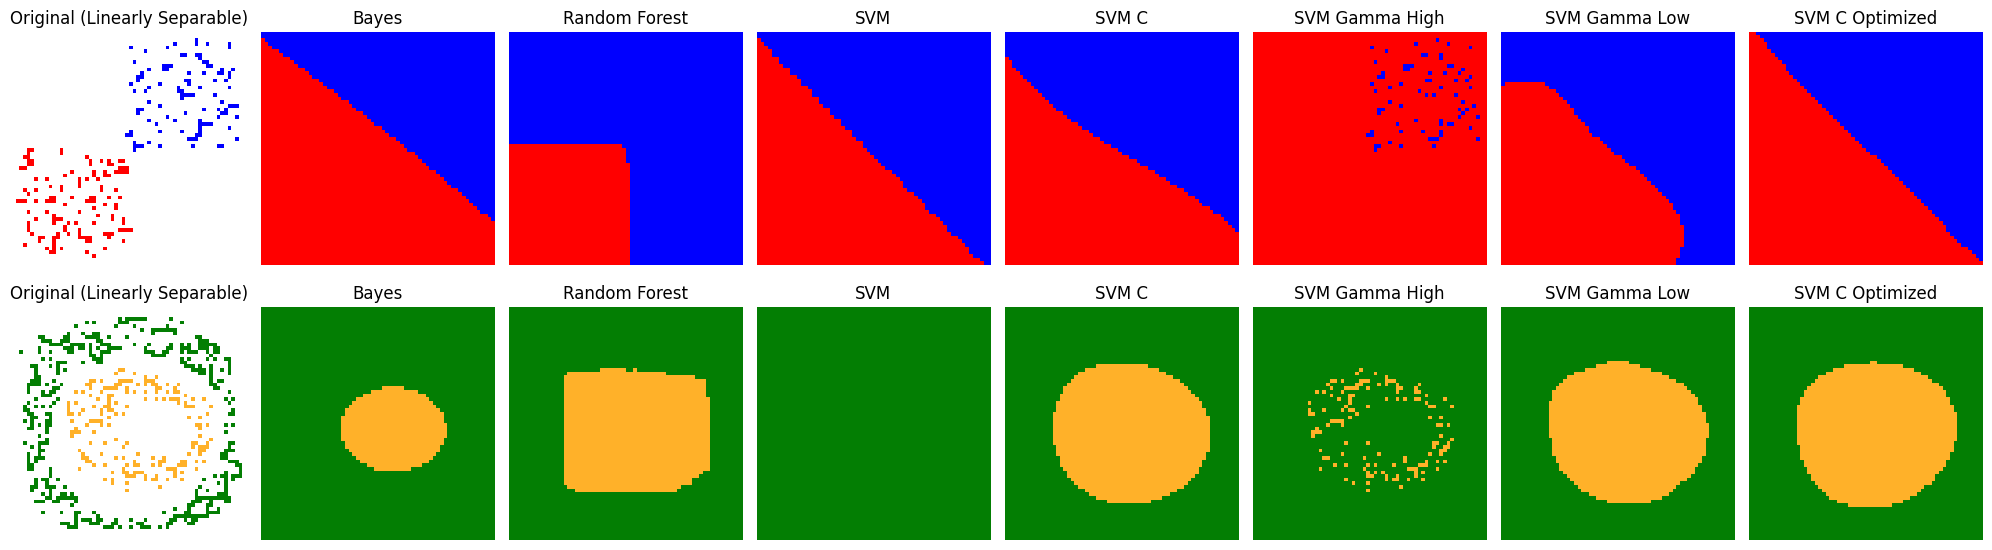

<strong>15.</strong> Realizează un studiu de sensibilitate privind selecția datelor (fișierele data1 și data2) din imaginile originale (vezi primul punct din Descrierea Detaliată a Cerințelor), folosind unul dintre clasificatorii utilizați anterior. Explicație: Se presupune că pixelii din seturile de antrenare sunt derivați dintr-o imagine reală pe care o cunoașteți teoretic. Ajustați pixelii selectați, ținând cont de forma imaginii reale.

Generează două fișiere suplimentare, data12 și data22, și folosește unul dintre cei trei clasificatori pentru a prezice culoarea pentru toți pixelii din prima și a doua imagine. Compară rezultatele obținute (folosind data1 față de data12 și data2 față de data22). Oferă o explicație pentru rezultatele observate.





In [45]:
# pass

<strong>16.</strong> Realizează un studiu privind influența dimensiunii seturilor de antrenare și testare pentru unul dintre clasificatorii la alegerea ta.



 `test_size = 0.3` 
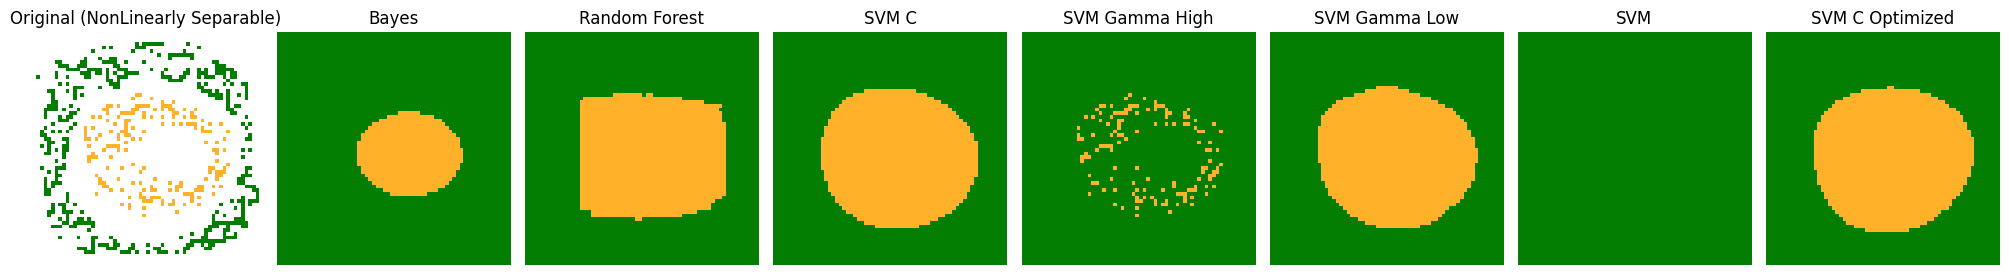
 `test_size = 0.1`
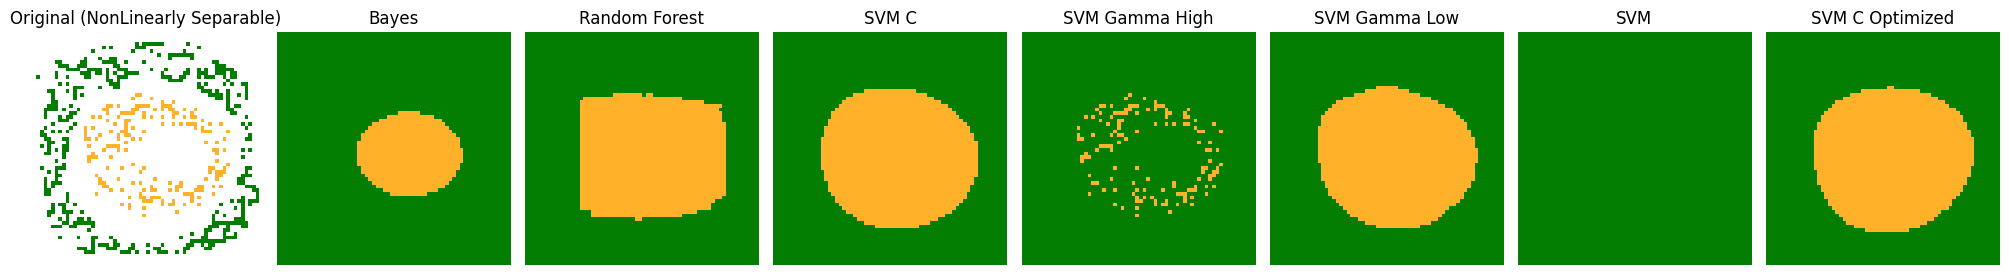
 `test_size = 0.5`
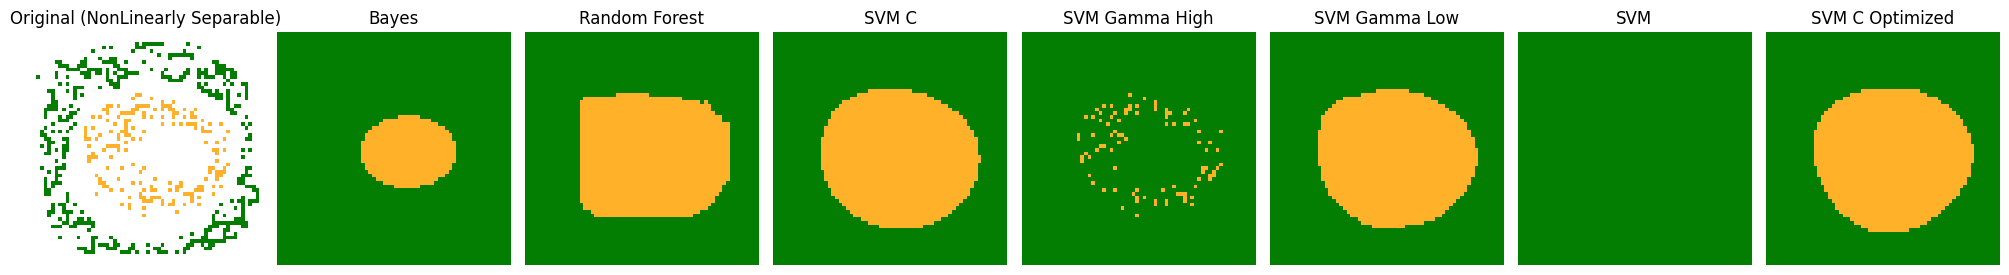
 `test_size = 0.9`
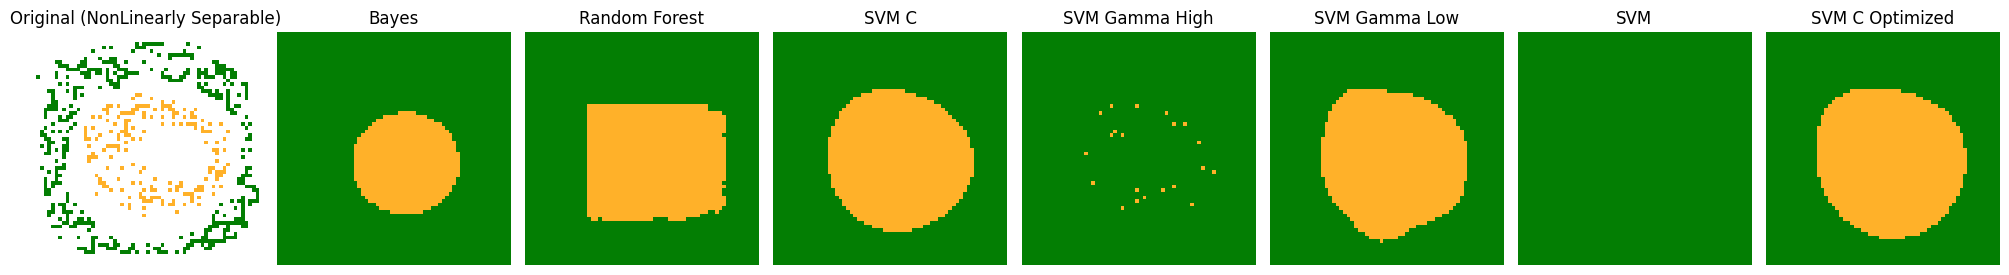


Dimensiunea setului de antrenament influenteaza performanta modelelor.
Pe masura ce dimensiunea setului de antrenament creste performanta ar trebui sa fie mai buna, deoarece modelul are mai multe date
